<a href="https://colab.research.google.com/github/smishra9/64060-SUMIT.DUTT.MISHRA/blob/main/Multiple%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
%matplotlib inline


####Importing the dataset

In [ ]:
data = pd.read_csv('/content/hour.csv')

####Understanding the data


###### instant: record index

###### dteday: date

###### season: season (1:spring, 2:summer, 3:fall, 4:winter)

###### yr: year (0: 2011, 1:2012)

###### mnth: month ( 1 to 12)

###### holiday: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

###### weekday: day of the week

###### workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

###### weathersit:

###### 1: Clear, Few clouds, Partly cloudy

###### 2: Mist and Cloudy, Mist and Broken clouds, Mist and Few clouds, Mist

###### 3: Light Snow, Light Rain and Thunderstorm and Scattered clouds, Light Rain and Scattered clouds

###### 4: Heavy Rain and Ice Pallets and Thunderstorm and Mist, Snow and Fog

###### temp: Normalized temperature in Celsius. The values are divided to 41 (max)

###### atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

###### hum: Normalized humidity. The values are divided to 100 (max)

###### windspeed: Normalized wind speed. The values are divided to 67 (max)

###### casual: count of casual users

###### registered: count of registered users

###### cnt: count of total rental bikes including both casual and registered

###### Updated Attributies:
###### We created new attributes to denormalize the actual values, since the normalized values were very low and factorized the categorical attributes.

###### actual_temp: Converted normalized temperature in Celsius

###### actual_windspeed: Converted normalized windspeed

###### actual_humidity: Converted normalized humidity

###### actual_feel_temp: Converted normalized feeled temperature in Celsius

###### mean_acttemp_feeltemp: Created a mean of actual temperature and feel temperature

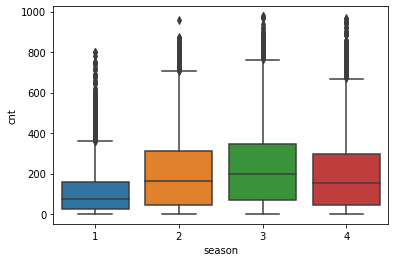

In [ ]:
sns.boxplot(data = data, x= 'season', y = 'cnt')

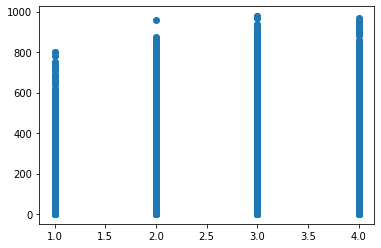

In [ ]:
plt.scatter(data.season,data.cnt)

In [ ]:
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
data =data.drop(['instant'],axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [ ]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


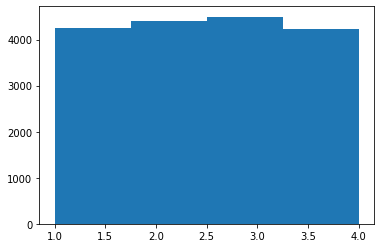

In [ ]:
plt.hist(data.season, bins = 4)
plt.show()

####We can see that the data is evenly distributed



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


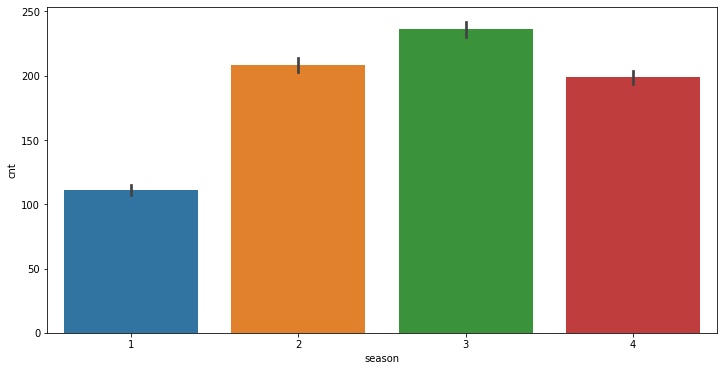

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(data.season, data.cnt, x ='Season',y ='Count of Rentals')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


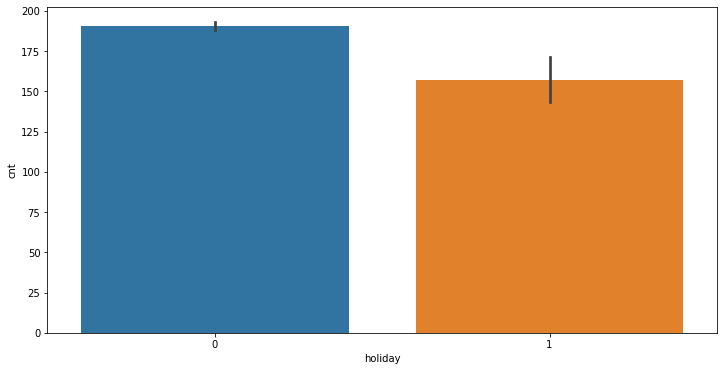

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(data.holiday, data.cnt, x ='holiday',y ='Count of Rentals')

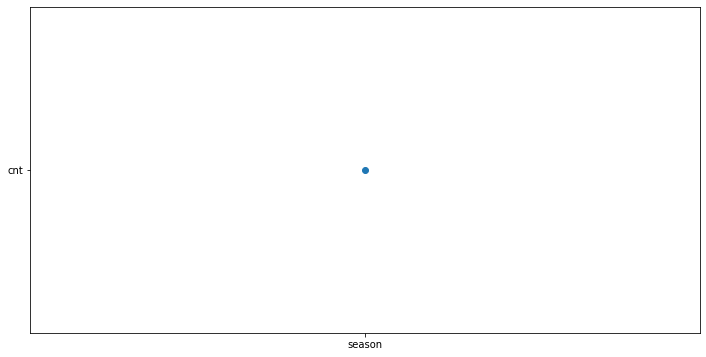

In [ ]:
plt.xlabel = 'Values/Fees'
plt.ylabel = 'Years'
plt.title ='Scatter Plot'
plt.scatter(data = data, x= 'season', y = 'cnt');

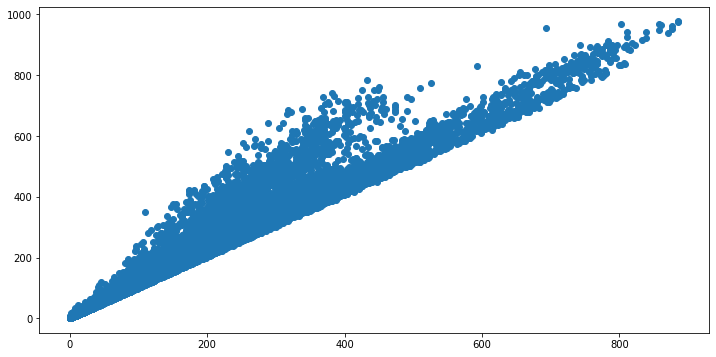

In [ ]:
plt.xlabel = 'Registered'
plt.ylabel = 'Count of Rentals'
plt.title ='Scatter Plot'
plt.scatter(data.registered, data.cnt)

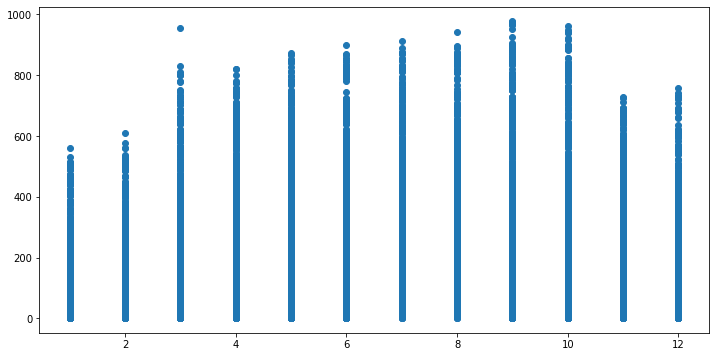

In [ ]:
plt.xlabel = 'Month'
plt.ylabel = 'Years'
plt.title ='Scatter Plot'
plt.scatter(data.mnth, data.cnt)

In [ ]:
data.dteday.value_counts()

2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64

In [ ]:
sns.boxplot(data = data, x= 'season', y = 'cnt')

ValueError: ignored

####Here we can see that dteday variable is an object and needs to be converted to numerical data using one hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
data['dteday'] = model.fit_transform(data['dteday'])

In [ ]:
data.dteday.value_counts()

0      24
458    24
483    24
484    24
485    24
       ..
25     16
17     12
668    11
26      8
667     1
Name: dteday, Length: 731, dtype: int64

###Now looking for the missing values


In [ ]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

####We can clearly see that the data does not have any missing values

####We can also see that units in different variable if different , Thus we need to normalise the values


In [ ]:
data_predictors= data.drop(['cnt'], axis =1 )
data_target = data['cnt']

In [ ]:
data_predictors

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
1,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
2,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
3,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
4,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,730,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108
17375,730,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81
17376,730,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83
17377,730,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48


In [ ]:
data_predictors = data_predictors.drop([3,4,5,6,10,11,12], axis =1)

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(x_scaled)

In [ ]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369
1,0.0,0.0,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959
2,0.0,0.0,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762
3,0.0,0.0,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295
4,0.0,0.0,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000


In [ ]:
####CONCATTING THE DATA
final = pd.concat([data_predictors,data_target],axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.81,0.000000,0.008174,0.014673,0.015369
1,0.0,0.0,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,0.021798,0.036117,0.039959
2,0.0,0.0,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,0.013624,0.030474,0.031762
3,0.0,0.0,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,0.008174,0.011287,0.012295
4,0.0,0.0,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,0.000000,0.001129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,0.0,1.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,0.029973,0.121896,0.120902
17375,1.0,0.0,1.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,0.021798,0.091422,0.090164
17376,1.0,0.0,1.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.244898,0.2576,0.60,0.193018,0.019074,0.093679,0.091189
17377,1.0,0.0,1.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.244898,0.2727,0.56,0.157870,0.035422,0.054176,0.061475


In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test= train_test_split(data,test_size = 0.25,random_state=42)

In [ ]:
data_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1945,0.115068,0.333333,0.0,0.181818,0.869565,0.0,1.000000,0.0,0.333333,0.265306,0.2727,0.45,0.298225,0.049046,0.075621,0.086066
13426,0.772603,0.666667,1.0,0.545455,0.652174,0.0,0.500000,1.0,0.666667,0.918367,0.8485,0.35,0.421065,0.114441,0.171558,0.197746
12898,0.742466,0.666667,1.0,0.454545,0.652174,0.0,0.333333,1.0,0.000000,0.714286,0.6515,0.28,0.543905,0.239782,0.258465,0.323770
2570,0.152055,0.333333,0.0,0.272727,0.000000,0.0,0.833333,1.0,0.000000,0.346939,0.3485,0.62,0.228047,0.008174,0.033860,0.032787
10764,0.620548,0.333333,1.0,0.181818,0.652174,0.0,0.666667,1.0,0.000000,0.510204,0.5000,0.39,0.421065,0.297003,0.223476,0.313525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.650685,0.333333,1.0,0.272727,0.391304,0.0,0.833333,1.0,0.000000,0.448980,0.4545,0.88,0.105325,0.081744,0.371332,0.366803
11964,0.689041,0.333333,1.0,0.363636,0.739130,0.0,0.833333,1.0,0.000000,0.653061,0.6212,0.34,0.157870,0.337875,0.776524,0.830943
5390,0.312329,0.666667,0.0,0.636364,0.521739,0.0,0.500000,1.0,0.000000,0.795918,0.7273,0.43,0.333373,0.070845,0.183973,0.192623
860,0.052055,0.000000,0.0,0.090909,0.304348,0.0,0.333333,1.0,0.000000,0.224490,0.1970,0.65,0.491243,0.008174,0.109481,0.101434


In [ ]:
train_pred = data_train.drop([15], axis =1)
train_target =data_train[15]
test_pred = data_test.drop([15], axis =1)
test_target =data_test[15]


####Using multiple regression model


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
main = model.fit(train_pred,train_target)

In [ ]:
main.score(train_pred,train_target)

1.0

In [ ]:
model1 = main.predict(test_pred)
print(model1)

[0.43442623 0.08913934 0.00307377 ... 0.08913934 0.01331967 0.15061475]


(array([1769.,  953.,  650.,  416.,  222.,  155.,   90.,   43.,   38.,
           9.]),
 array([-3.13984949e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
         4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

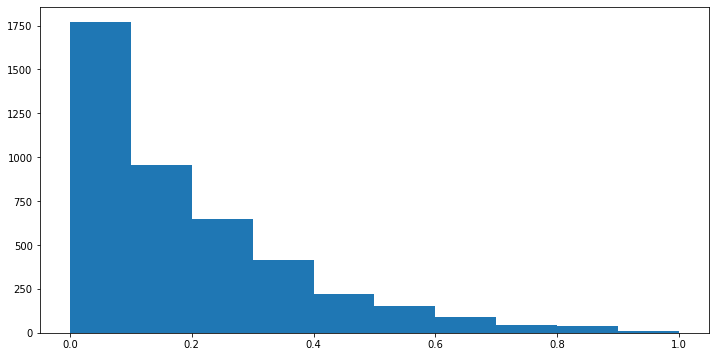

In [ ]:
plt.hist(model1)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
coef = main.coef_
print('coefficient :', coef)

coefficient : [-5.48825515e-16  3.74700271e-16  4.57966998e-16  2.22044605e-16
  1.42735216e-16 -1.28694798e-16  9.18319240e-17  4.29344060e-17
  1.34766330e-16  1.90819582e-17 -1.54390389e-16 -2.40015256e-17
  1.98192157e-16  3.76024590e-01  9.07786885e-01]


In [ ]:
intercept = main.intercept_
print('intercept: ', intercept)

intercept:  -0.001024590163934691


In [ ]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.22449,0.2879,0.81,0.0,0.008174,0.014673,0.015369


### target = 1.6(dteday) -9.37(yr)-7.70(mnth)-1.25(hr) -3.23(holiday) -7.727(weekday) +2.44(workingday) + 3.54(weathersit) +2.66(temp) +7.54(atemp) -3.16(hum) + 2.87(windspeed) +3.6(casual) +8.86(registered)

In [ ]:
from sklearn import metrics


In [ ]:
model.score(test_pred, test_target)

1.0

In [ ]:
mae = metrics.mean_absolute_error(test_target, model1)
mse = metrics.mean_squared_error(test_target, model1)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(model1,test_target)

In [ ]:
print('MAE:', mae)
print('Mean Squared Error:', mse)
print('RMSE:' , rmse)
print('R-Squared:', r2)

MAE: 1.305434811042465e-16
Mean Squared Error: 2.742615262216254e-32
RMSE: 1.6560843161555073e-16
R-Squared: 1.0


####We can clearly say our model is doing perfectly well